## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, num_class=10):
    """Code Here
    建立你的神經網路
    """
    keras.backend.clear_session()
    input_layer = keras.models.Input(input_shape)
    x = keras.layers.Dense(units=512, activation='relu', name='hidden_layer1')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu', name='hidden_layer2')(x)
    x = keras.layers.Dense(units=128, activation='relu', name='hidden_layer3')(x)
    out = keras.layers.Dense(units=num_class, activation='softmax', name='output')(x)
    model = keras.models.Model(input=[input_layer], output=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
EPOCHS = 50
BATCH_SIZE = 32
LEARNING_RATE = 1e-3
MOMENTUM = 0.95
EARLYSTOP = [5, 10, 25]

In [9]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for earlystop in EARLYSTOP:
    model = build_mlp(x_train.shape[1:])
    opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    callback_earlystop = EarlyStopping(monitor='val_accuracy', patience=earlystop, verbose=1)
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True,
             callbacks=[callback_earlystop])

    exp_stop = 'exp_stop_%d' % earlystop
    results[exp_stop] = {'loss': model.history.history['loss'],
                         'val_loss': model.history.history['val_loss'],
                         'accuracy': model.history.history['accuracy'],
                         'val_accuracy': model.history.history['val_accuracy']}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  if sys.path[0] == '':


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 270us/step - loss: 1.8747 - accuracy: 0.3204 - val_loss: 1.7260 - val_accuracy: 0.3727
Epoch 2/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.6906 - accuracy: 0.3915 - val_loss: 1.7081 - val_accuracy: 0.3895
Epoch 3/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.6052 - accuracy: 0.4236 - val_loss: 1.5695 - val_accuracy: 0.4426
Epoch 4/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.5486 - accuracy: 0.4438 - val_loss: 1.5843 - val_accuracy: 0.4439
Epoch 5/50
50000/50000 [==============================] - 13s 258us/step - loss: 1.5071 - accuracy: 0.4583 - val_loss: 1.5274 - val_accuracy: 0.4586
Epoch 6/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.4693 - accuracy: 0.4733 - val_loss: 1.5068 - val_accuracy: 0.4656
Epoch 7/50
50000/50000 [==============================] 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  if sys.path[0] == '':


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.8640 - accuracy: 0.3209 - val_loss: 1.6958 - val_accuracy: 0.3861
Epoch 2/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.6883 - accuracy: 0.3938 - val_loss: 1.6082 - val_accuracy: 0.4230
Epoch 3/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.6009 - accuracy: 0.4271 - val_loss: 1.5851 - val_accuracy: 0.4348
Epoch 4/50
50000/50000 [==============================] - 14s 272us/step - loss: 1.5376 - accuracy: 0.4494 - val_loss: 1.4957 - val_accuracy: 0.4678
Epoch 5/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.4975 - accuracy: 0.4631 - val_loss: 1.5246 - val_accuracy: 0.4594
Epoch 6/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.4633 - accuracy: 0.4762 - val_loss: 1.4859 - val_accuracy: 0.4716
Epoch 7/50
50000/50000 [==============================] 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  if sys.path[0] == '':


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 270us/step - loss: 1.8675 - accuracy: 0.3224 - val_loss: 1.7388 - val_accuracy: 0.3729
Epoch 2/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.6715 - accuracy: 0.3961 - val_loss: 1.6099 - val_accuracy: 0.4231
Epoch 3/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.5832 - accuracy: 0.4323 - val_loss: 1.5696 - val_accuracy: 0.4405
Epoch 4/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.5310 - accuracy: 0.4518 - val_loss: 1.5064 - val_accuracy: 0.4614
Epoch 5/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.4876 - accuracy: 0.4660 - val_loss: 1.4869 - val_accuracy: 0.4695
Epoch 6/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.4606 - accuracy: 0.4759 - val_loss: 1.4985 - val_accuracy: 0.4698
Epoch 7/50
50000/50000 [==============================] 

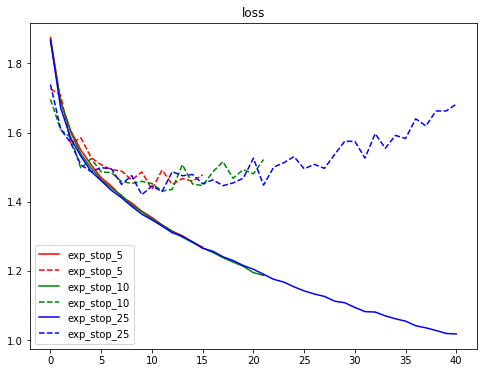

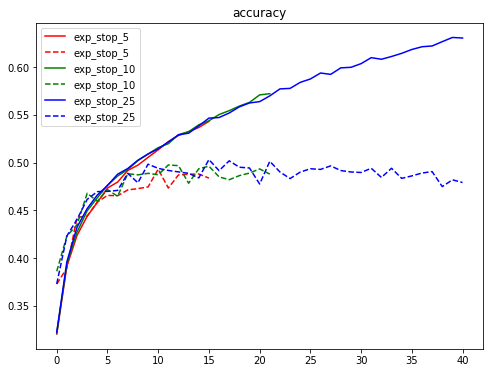

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['loss'])), results[cond]['loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '--', label=cond, color=color_bar[i])
plt.title('loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['accuracy'])), results[cond]['accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_accuracy'])), results[cond]['val_accuracy'], '--', label=cond, color=color_bar[i])
plt.title('accuracy')
plt.legend()
plt.show()

